# Primeros pasos con filtros colaborativos en SURPR!SE

## Setup

Ejecute estas celdas para instalar todos los paquetes que necesita para completar el resto del caso de estudio. Esto puede tardar unos minutos, así que tenga paciencia.

In [1]:
!pip install surprise==0.1

     |████████████████████████████████| 3.3MB 3.9MB/s eta 0:00:01
  Stored in directory: /home/nbuser/.cache/pip/wheels/ec/c0/55/3a28eab06b53c220015063ebbdb81213cd3dcbb72c088251ec
Successfully built scikit-surprise
You should consider upgrading via the 'pip install --upgrade pip' command.


Now, you must press **Kernel > Restart.** This allows the installation to take effect. Once you see the blue **Connected/Kernel ready** button in the top right, you are good to go.

## Import

In [2]:
import pandas as pd
import matplotlib
from surprise import Dataset, SVD, NormalPredictor, BaselineOnly, KNNBasic, NMF
from surprise.model_selection import cross_validate, KFold

## Data

Use the [`**Dataset.load_builtin**`](http://surprise.readthedocs.io/en/stable/dataset.html#surprise.dataset.Dataset.load_builtin) function to load the data.

In [3]:
# Your code here to load the data...
# Load the movielens-100k dataset
# Ref: https://surprise.readthedocs.io/en/stable/dataset.html
data = Dataset.load_builtin('ml-100k')
print('Data loaded')

Dataset ml-100k could not be found. Do you want to download it? [Y/n] Y
Trying to download dataset from http://files.grouplens.org/datasets/movielens/ml-100k.zip...
Done! Dataset ml-100k has been saved to /home/nbuser/.surprise_data/ml-100k
Data loaded


In [4]:
data

In [5]:
# Your code here to create a ratings histogram...
# 1. Get the ratings file from the data object
# This is just a filename that has all the data stored in it
ratings_file = data.ratings_file

In [7]:
# 2. Load that table using pandas, a commmon python data loading tool
# We set the column names manually here
col_names = ['user_id', 'item_id', 'rating', 'timestamp']
raw_data = pd.read_table(ratings_file, names=col_names)

In [10]:
raw_data.shape

(100000, 4)

We also want to get a sense of what the data looks like. Please create a histogram of all the ratings we have in the dataset.


Some data of the raw_data DataFrame
-----------------------------------
   user_id  item_id  rating  timestamp
0      196      242       3  881250949
1      186      302       3  891717742
2       22      377       1  878887116
3      244       51       2  880606923
4      166      346       1  886397596

Number of rows in the DataFrame
-------------------------------
user_id      100000
item_id      100000
rating       100000
timestamp    100000
dtype: int64

Some data of the ratings DataFrame
----------------------------------
0    3
1    3
2    1
3    2
4    1
Name: rating, dtype: int64


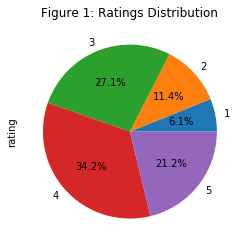

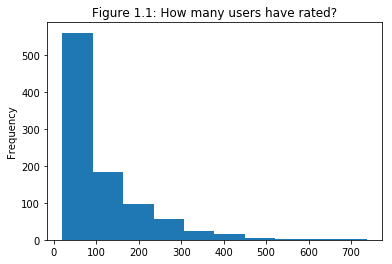

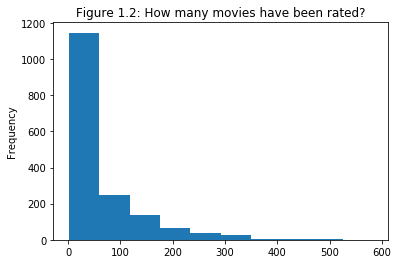

In [12]:
# Your code here to create a ratings histogram...
# 1. Get the ratings file from the data object
# This is just a filename that has all the data stored in it
ratings_file = data.ratings_file

# 2. Load that table using pandas, a commmon python data loading tool
# We set the column names manually here
col_names = ['user_id', 'item_id', 'rating', 'timestamp']
raw_data = pd.read_table(ratings_file, names=col_names)

# Preview the data using pandas head() function
print ('')
print ('Some data of the raw_data DataFrame')
print ('-----------------------------------')
print(raw_data.head())
print ('')
print ('Number of rows in the DataFrame')
print ('-------------------------------')
print(raw_data.count())

# 3. Get the rating column
ratings = raw_data.rating

# Preview the data using pandas head() function
print ('')
print ('Some data of the ratings DataFrame')
print ('----------------------------------')
print(ratings.head())

# 4. Generate a bar plot/histogram of that data

ratings.value_counts().sort_index().plot.pie(autopct='%1.1f%%', title='Figure 1: Ratings Distribution')

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
fig1, ax1 = plt.subplots()


raw_data.groupby(['user_id']).count()['rating'].plot(kind='hist', ax=ax, title='Figure 1.1: How many users have rated?')

raw_data.groupby(['item_id']).count()['rating'].plot(kind='hist', ax=ax1, title='Figure 1.2: How many movies have been rated?')




<h1 style="color:red;">QUESTION 1: DATA ANALYSIS</h1>

**Describe the dataset. How many ratings are in the dataset? How would you describe the distribution of ratings? Is there anything else we should observe? Make sure the histogram is visible in the notebook.**

<h1 style="color:green;">ANSWER 1</h1>

### Describe the dataset.
* The [MovieLens 100K Dataset](https://grouplens.org/datasets/movielens/100k/) is a  benchmark dataset of 100,000 ratings from 1000 users on 1700 movies. It was released on 1998. 
* MovieLens data sets were collected by the GroupLens Research Project at the University of Minnesota.
* This data set consists of:
	* 100,000 ratings (1-5) from 943 users on 1682 movies. 
	* Each user has rated at least 20 movies. Simple demographic info for the users (age, gender, occupation, zip).
* The ratings table is organized in 4 columns: user_id, item_id, rating and timestamp.
* I've made some data exploration using [pandas head() function](https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.head.html).

### How many ratings are in the dataset?
* The ratings in the dataset go from 1 to 5.

### How would you describe the distribution of ratings?
* Most of the records are among the ratings 3 (27%), 4 (34,2%) and 5 (21,2%). Only the 17,5% of the records belong to ratings 1 and 2 (see Figure 1).

### Is there anything else we should observe?

* Taking into account the algorithms we're going to use, It's important to analyze the distribution of the data. I've dug into the data wondering 2 questions: How many movies each user rate, and How many users each movie have been rated? In figures 1.1 and 1.2 we can see that few users rate lots of movies and few movies have been rated by lots of users. This is a scarce rating (discrete) data matrix. It is not a normal distribution. It is going to affect the performance of the algorithms. 

# Model 1: Random

In [14]:
# Create model using NormalPredictor() class
# Algorithm predicting a random rating based on the distribution of the training set, which is assumed to be normal.
# Ref: https://surprise.readthedocs.io/en/stable/basic_algorithms.html 
model_random = NormalPredictor()

In [15]:
# Train on data using cross-validation with k=5 folds, measuring the RMSE
# See the cross_validate function that we have imported above
# http://surprise.readthedocs.io/en/stable/model_selection.html#surprise.model_selection.validation.cross_validate
model_random_results = cross_validate(model_random, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm NormalPredictor on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.5075  1.5147  1.5174  1.5253  1.5338  1.5197  0.0091  
MAE (testset)     1.2111  1.2134  1.2187  1.2270  1.2347  1.2210  0.0088  
Fit time          0.16    0.19    0.18    0.19    0.22    0.19    0.02    
Test time         0.30    0.21    0.27    0.20    0.21    0.24    0.04    


# Model 2: User-Based Collaborative Filtering

In [16]:
# Create model using KNNBasic() class
# See the sim_options parameter to determine the user/item similarity calculation of the model
# http://surprise.readthedocs.io/en/stable/prediction_algorithms.html#similarity-measures-configuration

model_user = KNNBasic(sim_options={'user_based': True})
print('Model creation successful!')

Model creation successful!


In [17]:
# Train using same cross validation code as above
model_user_results = cross_validate(model_user, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
print('Model training successful!')

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9750  0.9788  0.9795  0.9829  0.9741  0.9781  0.0032  
MAE (testset)     0.7677  0.7719  0.7732  0.7778  0.7721  0.7725  0.0032  
Fit time          0.52    0.44    0.42    0.41    0.50    0.46    0.04    
Test time         5.75    5.61    5.46    5.66    5.50    5.59    0.10    
Model training successful!


# Model 3: Item-Based Collaborative Filtering

In [19]:
# Create model using KNNBasic() class
# Make sure you change the sim_options parameter from above
model_item = KNNBasic(sim_options={'user_based': False})
print('Model creation successful!')

Model creation successful!


In [20]:
# Train using same cross validation code as above
model_item_results = cross_validate(model_item, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
print('Model training successful!')

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9684  0.9810  0.9699  0.9740  0.9788  0.9744  0.0049  
MAE (testset)     0.7642  0.7759  0.7654  0.7710  0.7728  0.7698  0.0044  
Fit time          0.62    0.67    0.80    1.47    0.68    0.85    0.32    
Test time         6.33    6.60    8.33    6.77    6.92    6.99    0.70    
Model training successful!


<h1 style="color:red;">QUESTION 2: COLLABORATIVE FILTERING MODELS</h1>

**Compare the results from the user-user and item-item models. How do they compare to each other? How do they compare to our original "random" model? Can you provide any intuition as to why the results came out the way they did?**


<h1 style="color:green;">ANSWER 2</h1>

<h2 style="color:green;">Context:</h2>

First, some context about the algorithms and how I have used them:
* Model 1 uses a [NormalPredictor algorithm](https://surprise.readthedocs.io/en/stable/basic_algorithms.html#surprise.prediction_algorithms.random_pred.NormalPredictor). It predicts a random rating based on the distribution of the training set, which is assumed to be normal. This is one of the most basic algorithms that do not do much work. Thus, we don't expect to have a good RMSE, but use it as a base line for comparison.
* Models 2 and 3 use a [KNNBasic algorithm](https://surprise.readthedocs.io/en/stable/knn_inspired.html). KNNBasic algorithm is a basic collaborative filtering algorithm directly derived from a nearest neighbors approach. I've initialized them using the parameter sim_options in order to use a user or movie comparison.
* Since the framework we use provides not just the RMSE metric (wich was the proposed metric in the tutorial video), but also the MAE (Mean Absolute Error) metric, I've decided to use both metrics in my evaluation. In this case, both metrics have similar results, so I skip MAE in the final analysis. An interesting comparison of these metrics can be found [here](https://medium.com/human-in-a-machine-world/mae-and-rmse-which-metric-is-better-e60ac3bde13d).


<h2 style="color:green;">Results answers:</h2>


### Compare the results from the user-user and item-item models. How do they compare to each other?

Model 2 (User-Based Collaborative Filtering) and Model 3 (Item-Based Collaborative Filtering) produces **similar results in terms of RMSE**. Model 3performs a **slightly better** performance than Model 2.
* RSME results for the 3 first models:
    * Model 1: Mean RMSE: 1.5245
    * Model 2: Mean RMSE: 0.9794
    * Model 3: Mean RMSE: 0.9741 

**Note: actual values vary due to randomization. Therefore minimum changes may exist between the values shown in the response and the ones shown in the last execution you see above.**

### How do they compare to our original "random" model?

Models 2 and 3 **have significantly better performance** than Model 1 in terms of the RMSE metric (also with MAE metric).  

*Fit and Test times: It's interesting to note that Model 1 Fit and Test Times are both lower than Models 2 and 3. Within the scope of this exercise it's not relevant, however it may be a relevant aspect to consider in a system that requires a Fast & low quality configuration.*

### Can you provide any intuition as to why the results came out the way they did?

Actually, we didn't expect to have good results using the random algorithm, but use it as a baseline. The Random algorithm uses no information about the relations within the data, therefore it's intuitive result has worst performance comparing it to Models 2 and 3. It also considers a normal distribution in the data, and as it was shown in figures 1.1 and 1.2 it is not the case in this dataset.







# Model 4: Matrix Factorization

In [21]:
# Create model using SVD() class
# Ref: https://surprise.readthedocs.io/en/stable/matrix_factorization.html#surprise.prediction_algorithms.matrix_factorization.SVD
model_matrix = SVD()
print('Model creation successful!')

Model creation successful!


In [22]:
# Train using same cross validation code as above
model_matrix_results = cross_validate(model_matrix, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
print('Model training successful!')

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9375  0.9363  0.9255  0.9394  0.9354  0.9348  0.0048  
MAE (testset)     0.7391  0.7375  0.7280  0.7412  0.7374  0.7366  0.0045  
Fit time          7.00    7.33    6.79    6.78    6.77    6.93    0.21    
Test time         0.37    0.26    0.35    0.27    0.33    0.32    0.04    
Model training successful!


<h1 style="color:red;">QUESTION 3: MATRIX FACTORIZATION MODEL</h1>

**The matrix factorization model is different from the collaborative filtering models. Briefly describe this difference. Also, compare the RMSE again. Does it improve? Can you offer any reasoning as to why that might be?**

<h1 style="color:green;">ANSWER 3</h1>

### The matrix factorization model is different from the collaborative filtering models. Briefly describe this difference.

The [Singular-Value Decomposition (SVD)](https://en.wikipedia.org/wiki/Singular_value_decomposition) algorithm we are using is an implementation of Matrix Factorization. Unlike collaborative filtering models, the idea behind matrix factorization is to [represent users and items in a lower dimensional latent space](https://datajobs.com/data-science-repo/Recommender-Systems-[Netflix].pdf). These kinds of algorithms work by decomposing the user-item (in our case item=movie) interaction matrix into the product of two lower dimensionality rectangular matrices. Currently exists several approaches derived from the original [Simon Funk 2006 proposal](https://sifter.org/simon/journal/20061211.html). We are using a [basic implementation](https://surprise.readthedocs.io/en/stable/matrix_factorization.html#surprise.prediction_algorithms.matrix_factorization.SVD) of it. As a reference, the author of the Surprise Framework we are using, has a [very nice series of posts](http://nicolas-hug.com/blog/matrix_facto_1) explaining how Matrix Factorization works for recommendation systems. 

### Also, compare the RMSE again. Does it improve?

The RMSE for this algorithm **is 0.9364**. It is better than RMSE obtained by previous collaborative filtering models. Again, this SVD model is much better than the random model.

### Can you offer any reasoning as to why that might be?

Much [literature exists](https://sw.cs.wwu.edu/~tuora/aarontuor/materials/presentations/poster5.pdf) about the use of Matrix Factorization in recommendation systems. Especially to tackle the so called problem "Cold Start" (it means when the system starts to work and the matrix is not complete). Taking into account the number of ratings found in figures 1.1 and 1.2 make me think that it can explain why the SVD model might work better.  

Morover, since Collaborative Filtering Models calculates users similar interests (in the case of user-based) or movies similar themes (in the case of item-based) based on the near neighborhood, it seems that they are based on cover local information. Otherwise, Matrix Factorization seems to cover global information. 


# Precision and Recall @ `k`

We now want to compute the precision and recall for 2 values of `k`: 5 and 10. We have provided some code here to help you do that.

First, we define a function that takes in some predictions, a value of `k` and a threshold parameter. This code is adapted from [here](http://surprise.readthedocs.io/en/stable/FAQ.html?highlight=precision#how-to-compute-precision-k-and-recall-k).

In [23]:
def precision_recall_at_k(predictions, k=10, threshold=3.5):
    '''Return precision and recall at k metrics for each user.'''

    # First map the predictions to each user.
    user_est_true = dict()
    for uid, _, true_r, est, _ in predictions:
        current = user_est_true.get(uid, list())
        current.append((est, true_r))
        user_est_true[uid] = current

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])

        # Precision@K: Proportion of recommended items that are relevant
        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 1

        # Recall@K: Proportion of relevant items that are recommended
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 1

    return precisions, recalls

Next, we compute the precision and recall at `k` = 5 and 10 for each of our 4 models. We use 5-fold cross validation again to average the results across the entire dataseat.

Please note that this will take some time to compute.

<h1 style="color:red;">QUESTION 4: PRECISION/RECALL</h1>

**Compute the precision and recall, for each of the 4 models, at `k` = 5 and 10. This is 2 x 2 x 4 = 16 numerical values. Do you note anything interesting about these values? Anything differerent from the RMSE values you computed above?**

Some code is required for this question.

In [24]:
# Make list of k values
K = [5, 10]

# Make list of models
models = [model_random, model_user, model_item, model_matrix]

# Create k-fold cross validation object
kf = KFold(n_splits=5)

for k in K:
    for model in models:
        print(f'>>> k={k}, model={model.__class__.__name__}')
        # Run folder and take average
        p = []
        r = []
        for trainset, testset in kf.split(data):
            model.fit(trainset)
            predictions = model.test(testset, verbose=False)
            precisions, recalls = precision_recall_at_k(predictions, k=k, threshold=3.5)

            # Precision and recall can then be averaged over all users
            p.append(sum(prec for prec in precisions.values()) / len(precisions))
            r.append(sum(rec for rec in recalls.values()) / len(recalls))
        
        print('>>> precision:', round(sum(p) / len(p), 3))
        print('>>> reccall  :', round(sum(r) / len(r), 3))
        print('\n')


        print('Precision and recall computation successful!')

>>> k=5, model=NormalPredictor
>>> precision: 0.589
>>> reccall  : 0.345


Precision and recall computation successful!
>>> k=5, model=KNNBasic
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
>>> precision: 0.764
>>> reccall  : 0.456


Precision and recall computation successful!
>>> k=5, model=KNNBasic
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
>>> precision


Table 1: Precision@K
Precision@k        k=5   k=10
NormalPredictor  0.582  0.587
KNNBasic/user    0.762  0.734
KNNBasic/item    0.817  0.789
SVD              0.782  0.758


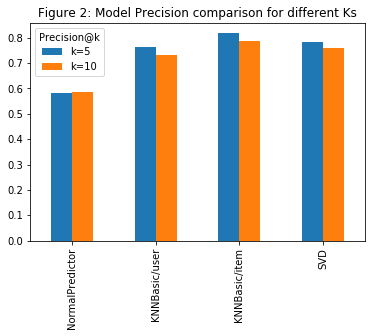

In [25]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import matplotlib

precision_at_k = np.array([
                        [0.582, 0.587],
                        [0.762, 0.734],
                        [0.817, 0.789],
                        [0.782, 0.758],
                       ])

df = DataFrame(precision_at_k,
               index=['NormalPredictor', 'KNNBasic/user', 'KNNBasic/item', 'SVD'],
               columns=pd.Index(['k=5', 'k=10'], name='Precision@k'))

print('')
print('Table 1: Precision@K')
print(df)

df.plot(kind='bar', title='Figure 2: Model Precision comparison for different Ks')



Table 2: Recall@K
Recall@K           k=5   k=10
NormalPredictor  0.338  0.435
KNNBasic/user    0.458  0.590
KNNBasic/item    0.390  0.532
SVD              0.434  0.561


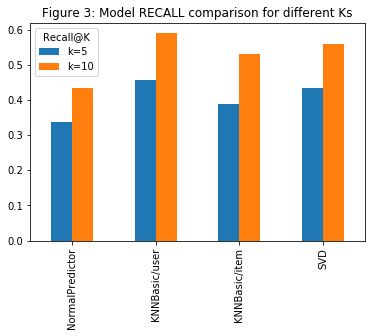

In [26]:
recall_at_k = np.array([
                        [0.338, 0.435],
                        [0.458, 0.59],
                        [0.39, 0.532],
                        [0.434, 0.561],
                       ])

df = DataFrame(recall_at_k,
               index=['NormalPredictor', 'KNNBasic/user', 'KNNBasic/item', 'SVD'],
               columns=pd.Index(['k=5', 'k=10'], name='Recall@K'))

print('')
print('Table 2: Recall@K')
print(df)

df.plot(kind='bar', title='Figure 3: Model RECALL comparison for different Ks')


Table 3: Precision, Recall and RMSE with k=5
Precision, Recall and RMSE with k=5  Precision(k=5)  Recall(k=5)  RMSE(k=5)
NormalPredictor                               0.582        0.338     1.5245
KNNBasic/user                                 0.762        0.458     0.9794
KNNBasic/item                                 0.817        0.390     0.9741
SVD                                           0.782        0.434     0.9364


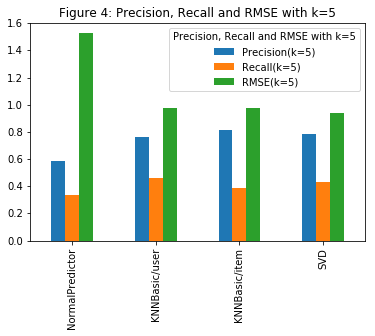

In [27]:

precision_recall_rmse = np.array([
                        [0.582, 0.338, 1.5245],
                        [0.762, 0.458, 0.9794],
                        [0.817, 0.39, 0.9741],
                        [0.782, 0.434, 0.9364],
                       ])

df = DataFrame(precision_recall_rmse,
               index=['NormalPredictor', 'KNNBasic/user', 'KNNBasic/item', 'SVD'],
               columns=pd.Index(['Precision(k=5)', 'Recall(k=5)', 'RMSE(k=5)'], name='Precision, Recall and RMSE with k=5'))

print('')
print('Table 3: Precision, Recall and RMSE with k=5')
print(df)

df.plot(kind='bar', title='Figure 4: Precision, Recall and RMSE with k=5')

<h1 style="color:green;">ANSWER 4</h1>

First, some recap about the metrics we are going to analyze:
* Precision@k
    * Math: Precision@k= (# of recommended items @k that are relevant) / (# of recommended items @k)
    * Textual: Precision at k is the proportion of recommended items in the top-k set that are relevant
* Recall@k
    * Math: Recall@k = (# of recommended items @k that are relevant) / (# of relevant items @k)
    * Textual: Recall at k is the proportion of relevant items found in the top-k recommendations
* An item is considered **relevant** if its true rating is greater than a given threshold. 
* An item is considered **recommended** if its estimated rating is greater than the threshold, and if it is among the k highest estimated ratings.
* With k=5 we model a top-5-movies-recommendation system. With k=10 we model a top-10-movies-recommendation system.




### Compute the precision and recall, for each of the 4 models, at `k` = 5 and 10. This is 2 x 2 x 4 = 16 numerical values. 

The computation is completed in the cells above. For a better analysis, I have splitted the results in two tables "Table 1: Precision@K" and "Table 2: Recall@K above.

These matrixes are used to analyze the data (as described in the next section) with bar plots.

**Note: actual values vary due to randomization. Therefore minimum changes may exist between the values shown in the response and the ones shown in the last execution you see above.**

### Do you note anything interesting about these values? 

Figure 2 and Figure 3 plot the numerical values of the execution. Analyzing this plots we can conclude:
* There's no Precision improvement using NormalPredictor when we increse from k=5 to k=10. NormalPredictor is a poor approach, no matter if we are using a top-5 or a top-10 ranking for it (see Figure 2, first pair of bars). 
* The precision of NormalPredictor model is worse than the other three models.
* The precision using k=5 is slightly better than k=10 for models KNNBasic/user, KNNBasic/item and SVD. It seems that small top-k recomendation systems. This could impact in how we present the final [data product](https://www.linkedin.com/pulse/end-day-its-data-product-what-matters-mariano-minoli/) for the end user.
* The best Precision is achived by KNNBasic/item model with k=5.
* For all four models, a higher k implies a higher Recall. This is logic taking into account that a higher k meens a bigger top-k list and hence a better probability of increse the proportion of relevant items found.
* the best Recall is achived by KNNBasic/user model with k=10.






### Anything differerent from the RMSE values you computed above?**

To analyze this question I've created the Figure 4. Please note that RMSE metric has to be interpreted inversely proportional to Precision and Recall. Leaving aside the NormalPredictor model, it turns out to be interesting the result: While SVD model has better a RMSE metric, KNNBasic based models have better Precision and Recall results.

In cases like this, these results have to be shown to the end users in order to select the better configuration for the specific business domain rules.

#  Top-`n` Predictions

Finally, we can see what some of the actual movie ratings are for particular users, as outputs of our model.

Again, we define a helpful function.

In [28]:
def get_top_n(predictions, n=5):
    '''Return the top-N recommendation for each user from a set of predictions.

    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default
            is 10.

    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    '''

    # First map the predictions to each user.
    top_n = dict()
    for uid, iid, true_r, est, _ in predictions:
        current = top_n.get(uid, [])
        current.append((iid, est))
        top_n[uid] = current

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

Then, we call this function on each of our models, first training on **all** the data we have available, then predicting on the remaining, missing data. We use `n`=5 here, but you can pick any reasonable value of `n` you would like.

This may take some time to compute, so be patient.

Hint: Use [`**Dataset.build_full_trainset**`](http://surprise.readthedocs.io/en/stable/dataset.html#surprise.dataset.DatasetAutoFolds.build_full_trainset) to get the full trainset from the data. Then call [`**Trainset.build_anti_testset**`](http://surprise.readthedocs.io/en/stable/trainset.html#surprise.Trainset.build_anti_testset) to get the testset out. Finally, `fit` on the trainset, `test` on the testset, then pass that result to our `get_top_n` function.

In [29]:
trainset = data.build_full_trainset()
testset = trainset.build_anti_testset()
print('Trainset and testset creation successful!')

Trainset and testset creation successful!


<h1 style="color:red;">QUESTION 5: TOP N PREDICTIONS</h1>

**Do the top n predictions that you received make sense? What is the rating value (1-5) of these predictions? How could you use these predictions in the real-world if you were trying to build a generic content recommender system for a company?**

Some code is required for this question.

In [30]:
for model in models:
    model.fit(trainset)
    predictions = model.test(testset)
    top_n = get_top_n(predictions, n=5)
    # Print the first one
    user = list(top_n.keys())[0]
    print(f'model: {model}, {user}: {top_n[user]}')

print('Top N computation successful!')

model: <surprise.prediction_algorithms.random_pred.NormalPredictor object at 0x7f34834bea90>, 196: [('302', 5), ('451', 5), ('785', 5), ('1081', 5), ('332', 5)]
Computing the msd similarity matrix...
Done computing similarity matrix.
model: <surprise.prediction_algorithms.knns.KNNBasic object at 0x7f34834c5c88>, 196: [('1189', 5), ('1500', 5), ('814', 5), ('1536', 5), ('1599', 5)]
Computing the msd similarity matrix...
Done computing similarity matrix.
model: <surprise.prediction_algorithms.knns.KNNBasic object at 0x7f348350d080>, 196: [('1414', 4.666666666666667), ('1309', 4.5), ('1310', 4.5), ('1675', 4.333333333333333), ('1676', 4.3076923076923075)]
model: <surprise.prediction_algorithms.matrix_factorization.SVD object at 0x7f34834c5eb8>, 196: [('56', 4.701312166060202), ('127', 4.658816576877561), ('64', 4.626080733797251), ('357', 4.592360381595364), ('187', 4.556025331783972)]
Top N computation successful!


In [23]:
# Let's find out WHO IS USER 196 and WHAT movies have we recondended to him!
users_file = 'u.user'

col_names = ['user_id', 'age', 'profession', 'zip']
users_data = pd.read_table(users_file, names=col_names,sep='|')

print (users_data.loc[196])

user_id           49
age                M
profession    writer
zip            55105
Name: 196, dtype: object


In [72]:
import numpy as np

movies_file = 'u.item'

col_names = ['movie_id', 'movie_title', 'release_date', 'video_release_date', 'IMDb_URL', 'unknown', 'Action', 'Adventure', 'Animation', 'ChildrenComedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci_F', 'Thriller', ' War', 'Western']

movies_data = pd.read_table(movies_file, names=col_names,sep='|', encoding="iso-8859-1")

NormalPredictor_matrix =  np.array([('346', 5), ('785', 5), ('392', 5), ('246', 5), ('98', 5)])
KNNBasic_user_matrix =  np.array([('1189', 5), ('1500', 5), ('814', 5), ('1536', 5), ('1599', 5)])
KNNBasic_item_matrix =  np.array([('1414', 4.66), ('1309', 4.5), ('1310', 4.5), ('1675', 4.33), ('1676', 4.30)])
SVD_matrix =  np.array([('318', 4.63), ('114', 4.61), ('178', 4.47), ('483', 4.47), ( '190', 4.46)])

rows = NormalPredictor_matrix.shape[0]

print('Recommendations for NormalPredictor algorithm')

for x in range(0, rows):
    movie = movies_data.iloc[int(NormalPredictor_matrix[x,0])-1]
    print(movie.movie_id)

print('')
print('Recommendations for KNNBasic/user algorithm')

for x in range(0, rows):
    movie = movies_data.iloc[int(KNNBasic_user_matrix[x,0])-1]
    print(movie.movie_id)

rows = KNNBasic_user_matrix.shape[0]

print('')
print('Recommendations for KNNBasic/item algorithm')

rows = KNNBasic_item_matrix.shape[0]

for x in range(0, rows):
    movie = movies_data.iloc[int(KNNBasic_item_matrix[x,0])-1]
    print(movie.movie_id)

print('')
print('Recommendations for SVD algorithm')

rows = SVD_matrix.shape[0]

for x in range(0, rows):
    movie = movies_data.iloc[int(SVD_matrix[x,0])-1]
    print(movie.movie_id)

Recommendations for NormalPredictor algorithm
Jackie Brown (1997)
Only You (1994)
Man Without a Face, The (1993)
Chasing Amy (1997)
Silence of the Lambs, The (1991)

Recommendations for KNNBasic/user algorithm
Prefontaine (1997)
Santa with Muscles (1996)
Great Day in Harlem, A (1994)
Aiqing wansui (1994)
Someone Else's America (1995)

Recommendations for KNNBasic/item algorithm
Coldblooded (1995)
Very Natural Thing, A (1974)
Walk in the Sun, A (1945)
Sunchaser, The (1996)
War at Home, The (1996)

Recommendations for SVD algorithm
Schindler's List (1993)
Wallace & Gromit: The Best of Aardman Animation (1996)
12 Angry Men (1957)
Casablanca (1942)
Henry V (1989)


<h1 style="color:green;">ANSWER 5</h1>

### Do the top n predictions that you received make sense? 

In order to analyze if the predictions make any sense, I have created the list of movies recommended by all models (shown above). The list of movies seems to be logic for a 49 years old man. 

### What is the rating value (1-5) of these predictions? 

The rating value (1-5) of these predictions is the rating prediction for each user in the MovieLens-100k dataset. In the case of the results shown, they correspond to the user id 196.

### How could you use these predictions in the real-world if you were trying to build a generic content recommender system for a company?

These predictions can be used to recommend the user to see these movies. We can do this recommendation by sending an email o simply showing these pictures on top of the list when the user starts browsing our catalog (just like Netflix does).

<hr>

Great job! Now, make sure you check out the **Conclusion** section of the [instruction manual](https://courses.edx.org/asset-v1:MITxPRO+DSx+2T2018+type@asset+block@4.1_instruction_manual.html) to wrap up this case study properly.